In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

## Importing the dataset

In [45]:
train_df = pd.read_csv('A2Data_train.csv')
test_df = pd.read_csv('A2Data_test.csv')

df2 = pd.DataFrame(
    [dict(zip([col for col in train_df.columns], [col for col in train_df.columns]))])
train_df = pd.concat([df2,train_df], ignore_index = True)
X_train = train_df.iloc[:, 0:100].to_numpy()
y_train = train_df.iloc[:, 100].to_numpy()
X_train[0] = np.array([float(x) for x in X_train[0]])
y_train [0] = float(y_train[0])
X_train = X_train.astype('float32')
y_train = y_train.astype('float32')
ones = np.ones((X_train.shape[0],1))
X_train = np.hstack((X_train,ones))

y_train = y_train.reshape(10000,1)

In [46]:

df3 = pd.DataFrame(
    [dict(zip([col for col in test_df.columns], [col for col in test_df.columns]))])

test_df = pd.concat([df3,test_df], ignore_index = True)

X_test = test_df.iloc[:, 0:100].to_numpy()
y_test = test_df.iloc[:, 100].to_numpy()
X_test[0] = np.array([float(x) for x in X_test[0]])
y_test[0] = float(y_test[0])
X_test = X_test.astype('float32')
y_test = y_test.astype('float32')
ones_test = np.ones((X_test.shape[0],1))
X_test = np.hstack((X_test,ones_test))
y_test = y_test.reshape(X_test.shape[0],1)

In [47]:
print(np.mean(y_test))

2.207182


## Normal Equation Method

In [48]:
w_ml = ((np.linalg.inv(X_train.T @ X_train)) @ X_train.T ) @ y_train

## Gradient descent method

In [49]:
def gradient(X,w,y):
    n = np.shape(X)[0]
    grad = (2/n)*((X.T @ X) @ w - X.T @ y)
    return(grad)

In [50]:
def cost(X,w,y):
    return (np.linalg.norm(X @ w - y))**2

In [51]:
def R_sq(X,w,y):
    cost_r = cost(X,w,y)
    y_mean = np.mean(y)
    mean_sq_error = 0
    for i in range(y.shape[0]):
        mean_sq_error = mean_sq_error + (y[i] - y_mean)**2
    print(mean_sq_error)
    print(cost_r)
    return (((mean_sq_error - cost_r)/mean_sq_error) * 100)

Text(0, 0.5, 'Weights')

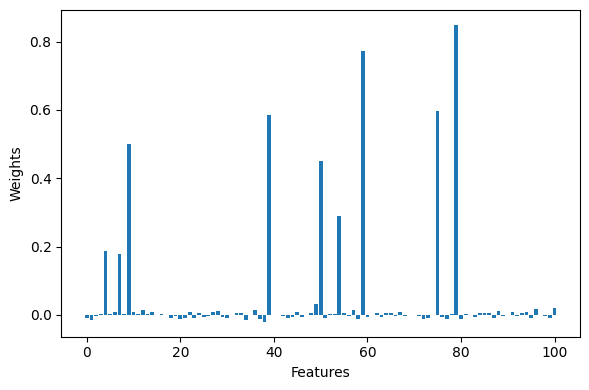

In [52]:
fig, ax = plt.subplots(figsize=(6, 4), tight_layout=True)
ax.bar(range(0,101),[w[0] for w in w_ml.tolist()])
ax.set_xlabel('Features')
ax.set_ylabel('Weights')

In [139]:
def gradient_descent(X,y,no_of_epochs, alpha):
    w = np.zeros((X.shape[1],1))
    cost_gradient_descent = []
    diff_from_wml = []
    for epoch in range(no_of_epochs):
        grad = gradient(X_train, w, y_train)
        w = w - alpha*grad
        #w = w - alpha*grad
        cost_gradient_descent.append(cost(X_train,w,y_train))
        diff_from_wml.append(np.linalg.norm(w - w_ml))
    #Plot for w-w_ml vs epoch
    fig, ax = plt.subplots(figsize=(6, 4), tight_layout=True)
    ax.plot(diff_from_wml)
    ax.set_xlabel('Epochs')
    ax.set_ylabel('$||w-w_{ML}||$')
    #Plot for error in each iteration
    fig2, ax2 = plt.subplots(figsize=(6, 4), tight_layout=True)
    ax2.plot(cost_gradient_descent)
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Error in each iteration')
    print(diff_from_wml[-1])
    return w

0.31343219434751934


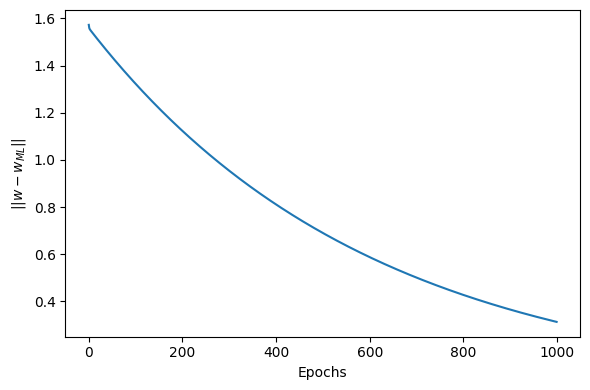

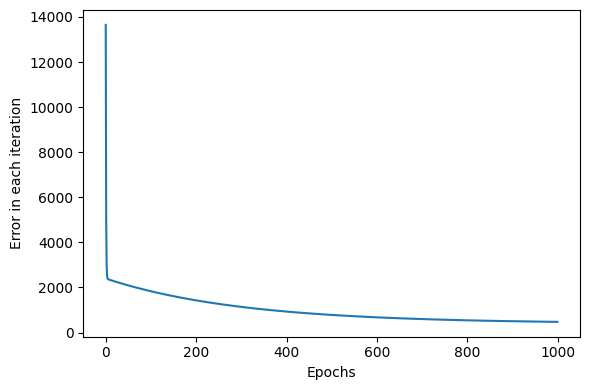

In [140]:
w_gd = gradient_descent(X_train, y_train, 1000, 1e-2)

## Stochastic Gradient Descent

In [141]:
print(cost(X_train, w_ml, y_train))
print(cost(X_test, w_ml, y_test))
print(cost(X_train, w_gd, y_train))
print(cost(X_test, w_gd, y_test))
print(R_sq(X_test, w_ml, y_test))

396.8521096219835
185.3757505375796
472.51052247767205
155.55303127788213
[113.77624]
185.3757505375796
[-62.930107]


In [116]:
def SGD(X, y, batch_size, no_of_epochs, learning_rate):
    data = np.hstack((X, y))
    n = data.shape[0]
    d = X.shape[1]
    n_batches = int(n/batch_size)
    w_iter = np.zeros((no_of_epochs,d)) #List containing w_i in each iteration
    cost_list = []
    diff_from_wml = []
    w_sgd = np.zeros((X.shape[1],1)) 
    for i in range(no_of_epochs):
        idx = np.random.randint(data.shape[0], size =  batch_size) #Choosing random list of Batch size 
        batch = data[idx,:]
        X_batch = batch[:, 0:data.shape[1]-1]
        y_batch = batch[:, data.shape[1]-1]
        y_batch = y_batch.reshape((batch_size, 1))
        grad = gradient(X_batch, w_sgd, y_batch)
        w_sgd = w_sgd - (learning_rate)*grad
        diff_from_wml.append((np.linalg.norm(w_sgd - w_ml))**2)
        cost_list.append(cost(X_batch, w_sgd, y_batch))
        w_iter[i] = w_sgd.T
        
    #Plot for w-w_ml vs epoch
    fig, ax = plt.subplots(figsize=(6, 4), tight_layout=True)
    ax.plot(diff_from_wml)
    ax.set_xlabel('Epochs')
    ax.set_ylabel('$||w^{t}-w_{ML}||$')
    #Plot for error in each iteration
    fig2, ax2 = plt.subplots(figsize=(6, 4), tight_layout=True)
    ax2.plot(cost_list)
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Error in each iteration')
    w_sgd_avg = np.mean(w_iter, axis = 0)
    return w_sgd


155.78057397314066
472.51052247767205
396.8521096219835


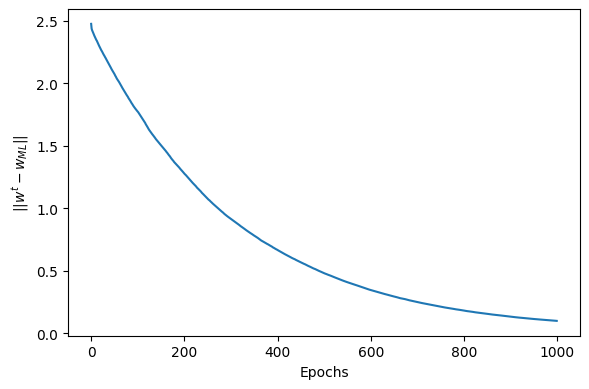

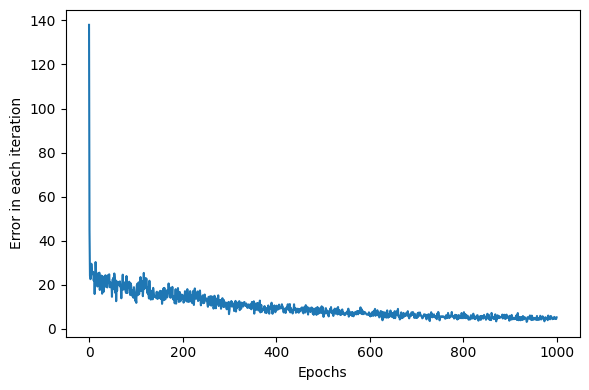

In [142]:
w_sgd_avg = SGD(X_train, y_train, 100, 1000, 1e-2)

print(cost(X_test,w_sgd_avg,y_test))
print(cost(X_train, w_gd, y_train))
print(cost(X_train, w_ml, y_train))

In [119]:
print(cost(X_train, w_sgd_avg, y_train))

477.4026228240352


## Ridge Regression

In [120]:
def l2_gradient(X, y, w, l2_penalty):
    n = X.shape[0]
    d = X.shape[1]
    return (2/n)*(((X.T @ X + np.identity(d)*l2_penalty) @ w) - (X.T @ y))

In [147]:
def ridge_regression(X,y,l2_penalty, learning_rate, number_of_epochs):
    w = np.zeros((X.shape[1],1))
    diff_from_wml = []
    cost_ridge = []
    for epoch in range(number_of_epochs):
        grad = l2_gradient(X = X, y = y, w = w, l2_penalty = l2_penalty)
        w = w - learning_rate*grad
        diff_from_wml.append(np.linalg.norm(w - w_ml))
        cost_ridge.append(cost(X = X, y = y, w = w))
    fig, ax = plt.subplots(figsize=(6, 4), tight_layout=True)
    ax.plot(diff_from_wml)
    ax.set_title('Ridge Regression')
    ax.set_xlabel('Epochs')
    ax.set_ylabel('$||w^{t}-w_{ML}||$')   
    
    fig2, ax2 = plt.subplots(figsize=(6, 4), tight_layout=True)
    ax2.plot(cost_ridge)
    ax2.set_title('Ridge Regression')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Error in each iteration')
    return w

473.43682288837357


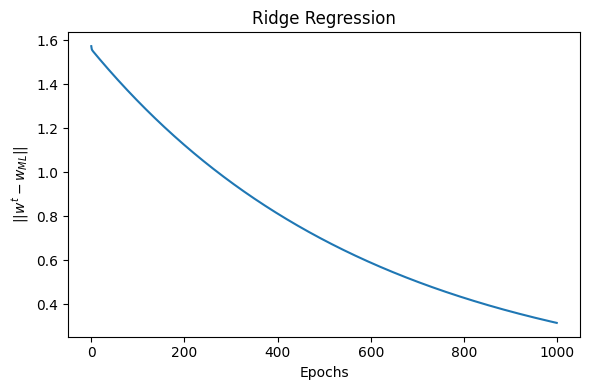

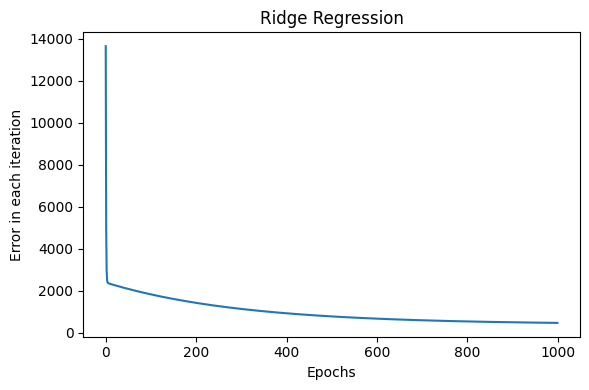

In [148]:
w_R = ridge_regression(X = X_train, y = y_train, learning_rate = 1e-2, l2_penalty = 2.028, number_of_epochs = 1000)
print(cost(X = X_train, y = y_train, w = w_R))

In [127]:
def kfold_cross_validation(X,y,number_of_epochs, k):
    n = X.shape[0]
    d = X.shape[1]
    fold_size = int(n/k)
    min_avg_cost = -1
    optimal_penalty = 0
    l2_penalties = np.linspace(0.01,10, 100)
    costs = []
    for l2_penalty in l2_penalties:
        sum_cost = 0
        for i in range(k):
            train_idx = [j1 for j1 in range(i*fold_size)] + [j2 for j2 in range((i+1)*fold_size, n)]
            X_test_fold = X[i*fold_size : (i+1)*fold_size,:]
            
            y_test_fold = y[i*fold_size : (i+1)*fold_size,:]
            X_train_fold = X[train_idx, :]
            y_train_fold = y[train_idx, :]
            #print(X_train_fold)
            #print(X_train_fold.shape)
            y_test_fold.reshape((fold_size, 1))
            y_train_fold.reshape((n-fold_size, 1))

            w_r_train = (np.linalg.inv((X_train_fold.T @ X_train_fold) + l2_penalty*np.identity(101)) @ X_train_fold.T) @ y_train_fold
            #ridge_regression(X = X_train_fold, y = y_train_fold, l2_penalty = l2_penalty, learning_rate = 1e-2, number_of_epochs = number_of_epochs)
            sum_cost = sum_cost + cost(X_test_fold, w_r_train, y_test_fold)
        avg_cost = sum_cost/k
        #print(avg_cost)
        costs.append(avg_cost)
        if(min_avg_cost == -1):
            min_avg_cost = avg_cost
            optimal_penalty = l2_penalty
        elif(min_avg_cost >= avg_cost):
            min_avg_cost = avg_cost
            optimal_penalty = l2_penalty
    fig, ax = plt.subplots(figsize=(6, 4), tight_layout=True)
    ax.scatter(l2_penalties, costs)
    ax.set_title('Ridge Regression')
    ax.set_xlabel('$\lambda$')
    ax.set_ylabel('Average error') 
    return optimal_penalty

2.028181818181818


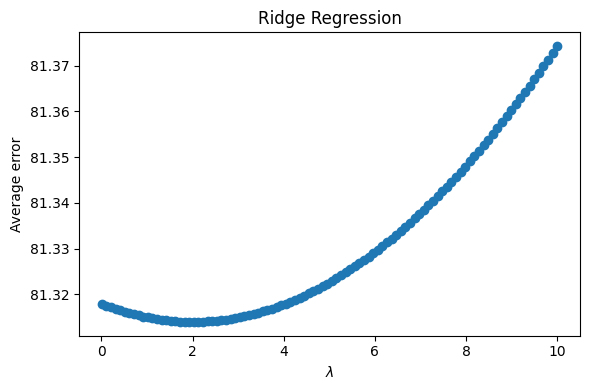

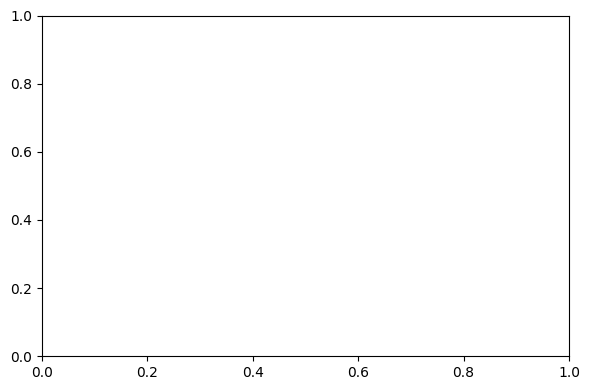

In [128]:
optimum_penalty = kfold_cross_validation(X_train, y_train, 1000, 5)
print(optimum_penalty)
w_R = ridge_regression(X = X_train, y = y_train, learning_rate = 1e-2, l2_penalty = optimum_penalty, number_of_epochs = 1000)


In [145]:
print(cost(X_train, w_R, y_train))
print(cost(X_test, w_ml, y_test))
print(cost(X_test, w_gd, y_test))

473.4369060991904
185.3757505375796
155.55303127788213


Text(0, 0.5, 'Weights')

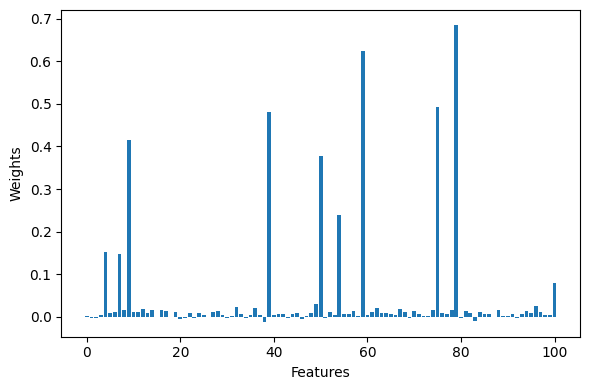

In [137]:
fig, ax = plt.subplots(figsize=(6, 4), tight_layout=True)
ax.bar(range(0,101),[w[0] for w in w_R.tolist()])
ax.set_xlabel('Features')
ax.set_ylabel('Weights')